In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
cholesterol = pd.read_csv(r'data_set\cholesterol.csv', index_col=0)
cholesterol

,trt,response
1,1time,3.8612
2,1time,10.3868
3,1time,5.9059
4,1time,3.0609
5,1time,7.7204
6,1time,2.7139
7,1time,4.9243
8,1time,2.3039
9,1time,7.5301
10,1time,9.4123


In [3]:
# 各组样本大小
cholesterol.groupby('trt').count()

,response
trt,
1time,10
2times,10
4times,10
drugD,10
drugE,10


In [4]:
# 各组均值
cholesterol.groupby('trt').mean()

,response
trt,
1time,5.78197
2times,9.22497
4times,12.37478
drugD,15.36117
drugE,20.94752


In [5]:
# 各组标准差
cholesterol.groupby('trt').std()

,response
trt,
1time,2.878113
2times,3.483054
4times,2.923119
drugD,3.454636
drugE,3.345003


In [6]:
# 检验组间差异
# statsmodels库调用aov函数可用于执行方差分析
model = smf.ols('response ~ C(trt)', data=cholesterol).fit()
model

In [7]:
# sum_sq: 
#   1) C(trt) 组间平方和 方差error sum of square （SSB）误差平方和，各组均值与总均值的误差平方和，反映各样本均值之间的差异程度 
#   2）Residual 组内平方和，各组数据与其均值的误差平方和，反映每个样本各观测值得离散情况
# mean_sq: mean squared error 均方误差
# df: 自由度
# F值：检验组间方差和组内方差的比率
# PR(>F): p值，用于判断组间差异是否显著。如果p值小于显著性水平（通常是0.05），则可以拒绝原假设（即组间均值相等）。
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(trt),4.0,1351.369014,337.842253,32.432826,9.818516e-13
Residual,45.0,468.750438,10.416676,NaN,NaN


In [8]:
# 解释sm.stats.anova_lm(model, type=2)
# type=1: Type I ANOVA(顺序方差分析)，假设每个因子在模型中的顺序是有意义的，计算每个因子时忽略其他因子对模型的贡献
# type=2: Type II ANOVA(平衡方差分析)，假设所有因子是平衡的，计算每个因子的效果时考虑其他因子，但不包括因子之间的交互作用
# type=3: Type III ANOVA(全模型方差分析)，假设模型中的所有因子和交互作用都是相关的，计算每个因子的效果时考虑其他因子和交互作用

In [9]:
cholesterol.response.mean()

12.738081999999999

In [10]:
((cholesterol.groupby('trt').mean() - cholesterol.response.mean()).apply(np.square) * 10).sum()

response    1351.369014
dtype: float64

In [11]:
tmp = cholesterol.merge(cholesterol.groupby('trt').mean().reset_index(), on='trt', how='left')

In [12]:
np.square(tmp.response_x - tmp.response_y).sum()

468.750438055

In [13]:
# 多重比较
tukey = pairwise_tukeyhsd(cholesterol[['response']], cholesterol[['trt']], alpha=0.05)
tukey

In [14]:
# 给出置信区间的上下限有什么用？
# 1、
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1time,2times,3.443,0.1381,-0.6583,7.5443,False
1time,4times,6.5928,0.0004,2.4915,10.6941,True
1time,drugD,9.5792,0.0,5.4779,13.6805,True
1time,drugE,15.1656,0.0,11.0643,19.2668,True
2times,4times,3.1498,0.205,-0.9515,7.2511,False
2times,drugD,6.1362,0.001,2.0349,10.2375,True
2times,drugE,11.7226,0.0,7.6213,15.8238,True
4times,drugD,2.9864,0.2512,-1.1149,7.0877,False
4times,drugE,8.5727,0.0,4.4715,12.674,True
drugD,drugE,5.5864,0.0031,1.4851,9.6876,True


In [16]:
# 双因素方差分析
toothgrowth = pd.read_csv(r'data_set\toothgrowth.csv', index_col=0)
toothgrowth

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5
7,11.2,VC,0.5
8,11.2,VC,0.5
9,5.2,VC,0.5
10,7.0,VC,0.5


In [17]:
toothgrowth.columns

Index(['len', 'supp', 'dose'], dtype='object')

In [18]:
# 每组样本量的统计
toothgrowth.groupby(['supp', 'dose'])[['len']].count().unstack()

len        
dose 0.5 1.0 2.0
supp            
OJ    10  10  10
VC    10  10  10

In [19]:
# 样本组的均值
toothgrowth.groupby(['supp', 'dose'])[['len']].mean().unstack()

len              
dose    0.5    1.0    2.0
supp                     
OJ    13.23  22.70  26.06
VC     7.98  16.77  26.14

In [20]:
# 样本组的标准差
toothgrowth.groupby(['supp', 'dose'])[['len']].std().unstack()

len                    
dose       0.5       1.0       2.0
supp                              
OJ    4.459709  3.910953  2.655058
VC    2.746634  2.515309  4.797731

In [23]:
tooth_model = smf.ols('len ~ C(dose) * C(supp)', data=toothgrowth).fit()

In [24]:
# mean_sq = sum_sq / df
# F 各因素的mean_sq / 残差的mean_sq
sm.stats.anova_lm(tooth_model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,2426.434333,1213.217167,91.999965,4.046291e-18
C(supp),1.0,205.350000,205.350000,15.571979,2.311828e-04
C(dose):C(supp),2.0,108.319000,54.159500,4.106991,2.186027e-02
Residual,54.0,712.106000,13.187148,NaN,NaN


<Axes: xlabel='dose', ylabel='len'>

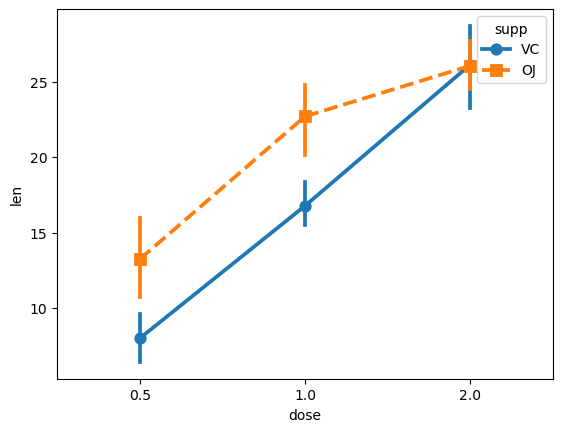

In [25]:
# seaborn 实现interaction plot
# 绘制交互作用图
# 该图展示了各剂量喂食下豚鼠牙齿长度的均值
sns.pointplot(x='dose', y='len', hue='supp', data=toothgrowth, markers=['o', 's'], linestyles=['-', '--'])

In [26]:
# 另一种图形表现方式
# 计算均值和置信区间
# 补充plot.errorbar的参数
# 单因素的处理方式
group_means = toothgrowth.groupby(['dose', 'supp'])['len'].mean()
group_counts = toothgrowth.groupby(['dose', 'supp'])['len'].count()
group_sems = toothgrowth.groupby(['dose', 'supp'])['len'].sem()
confidence_interval = stats.t.ppf(0.95, group_counts - 1) * group_sems

group_stats = pd.DataFrame({
    'Mean': group_means,
    'CI_Lower': group_means - confidence_interval,
    'CI_Upper': group_means + confidence_interval
})

print(group_stats)

            Mean   CI_Lower   CI_Upper
dose supp                             
0.5  OJ    13.23  10.644791  15.815209
     VC     7.98   6.387828   9.572172
1.0  OJ    22.70  20.432894  24.967106
     VC    16.77  15.311923  18.228077
2.0  OJ    26.06  24.520913  27.599087
     VC    26.14  23.358846  28.921154


In [27]:
# 双因素的处理方式
summary = toothgrowth.groupby(['dose', 'supp']).agg(['mean', 'count', 'std'])['len']
summary['sem'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, summary['count'] - 1)
summary.reset_index(inplace=True)

print(summary)

   dose supp   mean  count       std       sem      ci95
0   0.5   OJ  13.23     10  4.459709  1.410284  3.190283
1   0.5   VC   7.98     10  2.746634  0.868562  1.964824
2   1.0   OJ  22.70     10  3.910953  1.236752  2.797727
3   1.0   VC  16.77     10  2.515309  0.795410  1.799343
4   2.0   OJ  26.06     10  2.655058  0.839603  1.899314
5   2.0   VC  26.14     10  4.797731  1.517176  3.432090


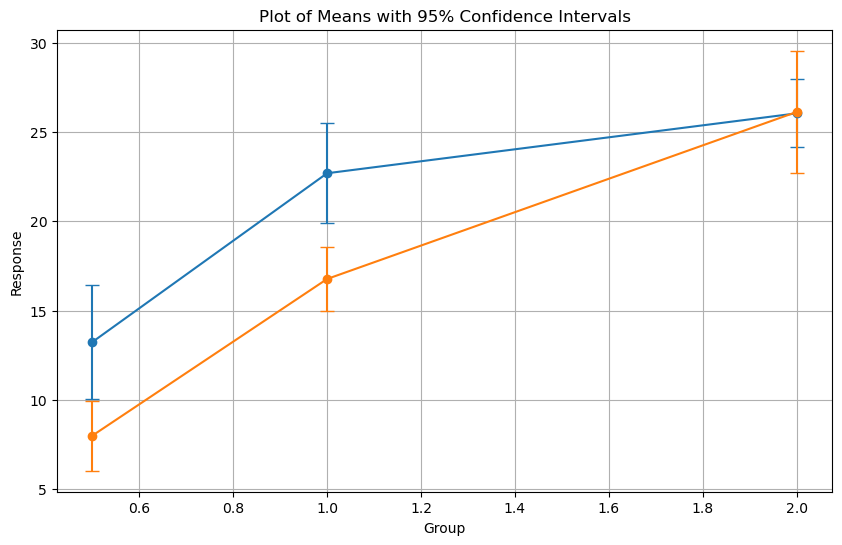

In [28]:
plt.figure(figsize=(10, 6))
for key, grp in summary.groupby('supp'):
    plt.errorbar(grp['dose'], grp['mean'], yerr=grp['ci95'], fmt='o-', capsize=5, label=key)


plt.title('Plot of Means with 95% Confidence Intervals')
plt.xlabel('Group')
plt.ylabel('Response')
plt.grid(True)
plt.show()

In [29]:
# 重复测试的方差分析
co2 = pd.read_csv(r'data_set\co2.csv', index_col=0)
co2

,Plant,Type,Treatment,conc,uptake
1,Qn1,Quebec,nonchilled,95,16.0
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
...,...,...,...,...,...
80,Mc3,Mississippi,chilled,250,17.9
81,Mc3,Mississippi,chilled,350,17.9
82,Mc3,Mississippi,chilled,500,17.9
83,Mc3,Mississippi,chilled,675,18.9
